# Stick-Breaking Process y Dirichlet Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose

In [2]:
def plot_atoms(C, alphas):
    plt.figure(figsize=(12,12))

    ax1 = plt.subplot(3, 2, 1)
    ax1.bar(range(1, len(C[0])+1), C[0], width=0.7, color="darkblue")
    ax1.set_title(rf"$\alpha$={alphas[0]}")

    ax2 = plt.subplot(3, 2, 2)
    ax2.bar(range(1, len(C[1])+1), C[1], width=0.7, color="darkblue")
    ax2.set_title(rf"$\alpha$={alphas[1]}")

    ax3 = plt.subplot(3, 2, 3)
    ax3.bar(range(1, len(C[2])+1), C[2], width=0.7, color="darkblue")
    ax3.set_title(rf"$\alpha$={alphas[2]}")

    ax4 = plt.subplot(3, 2, 4)
    ax4.bar(range(1, len(C[3])+1), C[3], width=0.7, color="darkblue")
    ax4.set_title(rf"$\alpha$={alphas[3]}")

    ax5 = plt.subplot(3, 2, 5)
    ax5.bar(range(1, len(C[4])+1), C[4], width=0.7, color="darkblue")
    ax5.set_title(rf"$\alpha$={alphas[4]}")

    # margins
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax5.spines['right'].set_visible(False)

    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax5.spines['top'].set_visible(False)

    plt.show()
    
    
def plot_dp(C, Phi, alphas):
    plt.figure(figsize=(12,12))

    ax1 = plt.subplot(3, 2, 1)
    ax1.vlines(x=Phi[0], ymin=0, ymax=C[0], color='black', linewidth=1.3)
    ax1.scatter(x=Phi[0], y=C[0], s=75, color='darkblue')
    ax1.set_title(rf"$\alpha$={alphas[0]}")

    ax2 = plt.subplot(3, 2, 2)
    ax2.vlines(x=Phi[1], ymin=0, ymax=C[1], color='black', linewidth=1.3)
    ax2.scatter(x=Phi[1], y=C[1], s=75, color='darkblue')
    ax2.set_title(rf"$\alpha$={alphas[1]}")

    ax3 = plt.subplot(3, 2, 3)
    ax3.vlines(x=Phi[2], ymin=0, ymax=C[2], color='black', linewidth=1.3)
    ax3.scatter(x=Phi[2], y=C[2], s=75, color='darkblue')
    ax3.set_title(rf"$\alpha$={alphas[2]}")

    ax4 = plt.subplot(3, 2, 4)
    ax4.vlines(x=Phi[3], ymin=0, ymax=C[3], color='black', linewidth=1.3)
    ax4.scatter(x=Phi[3], y=C[3], s=75, color='darkblue')
    ax4.set_title(rf"$\alpha$={alphas[3]}")

    ax5 = plt.subplot(3, 2, 5)
    ax5.vlines(x=Phi[4], ymin=0, ymax=C[4], color='black', linewidth=1.3)
    ax5.scatter(x=Phi[4], y=C[4], s=75, color='darkblue')
    ax5.set_title(rf"$\alpha$={alphas[4]}")

    # margins
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax5.spines['right'].set_visible(False)

    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax5.spines['top'].set_visible(False)

    plt.show()
    
def plot_samples_dp(phi, N, x_lim):
    plt.figure(figsize=(12,12))

    x1, y1 = np.unique(phi[0], return_counts=True)
    y1 = y1/N[0]
    ax1 = plt.subplot(3, 2, 1)
    ax1.vlines(x=x1, ymin=0, ymax=y1, color='black', linewidth=1.3)
    ax1.scatter(x=x1, y=y1, s=75, color='darkblue')
    ax1.set_title(f"N={N[0]}")

    x2, y2 = np.unique(phi[1], return_counts=True)
    y2 = y2/N[1]
    ax2 = plt.subplot(3, 2, 2)
    ax2.vlines(x=x2, ymin=0, ymax=y2, color='black', linewidth=1.3)
    ax2.scatter(x=x2, y=y2, s=75, color='darkblue')
    ax2.set_title(f"N={N[1]}")

    x3, y3 = np.unique(phi[2], return_counts=True)
    y3 = y3/N[2]
    ax3 = plt.subplot(3, 2, 3)
    ax3.vlines(x=x3, ymin=0, ymax=y3, color='black', linewidth=1.3)
    ax3.scatter(x=x3, y=y3, s=75, color='darkblue')
    ax3.set_title(f"N={N[2]}")

    x4, y4 = np.unique(phi[3], return_counts=True)
    y4 = y4/N[3]
    ax4 = plt.subplot(3, 2, 4)
    ax4.vlines(x=x4, ymin=0, ymax=y4, color='black', linewidth=1.3)
    ax4.scatter(x=x4, y=y4, s=75, color='darkblue')
    ax4.set_title(f"N={N[3]}")

    ax5 = plt.subplot(3, 2, 5)
    x5, y5 = np.unique(phi[4], return_counts=True)
    y5 = y5/N[4]
    ax5.vlines(x=x5, ymin=0, ymax=y5, color='black', linewidth=1.3)
    ax5.scatter(x=x5, y=y5, s=75, color='darkblue')
    ax5.set_title(f"N={N[4]}")

    # margins
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax5.spines['right'].set_visible(False)

    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax5.spines['top'].set_visible(False)

    # limits
    ax1.set_xlim(x_lim)
    ax2.set_xlim(x_lim)
    ax3.set_xlim(x_lim)
    ax4.set_xlim(x_lim)
    ax5.set_xlim(x_lim)
    
    plt.show()

# A. Dirichlet Distribution

A multivariate generalization of the beta distribution is the Dirichlet distribution, which has suppor over the probability simples, defined by

\begin{align}
\triangle_{K} = \{C: C_{k}\geq 0, \sum_{k=1}^{K}C_{k}=1\}
\end{align}

The pdf is defined as follows:

\begin{align}
Dir(C|\alpha) \triangleq \frac{\prod_{k=1}^{K}C_{k}^{\alpha_{k}-1}\mathbb{I}(C \in \triangle_{K})}{B(\alpha)}
\end{align}

In [3]:
def dirichlet(alpha, k, seed=0):
    np.random.seed(seed)
    C = np.random.dirichlet(alpha*np.ones(k), size=1).flatten()
    return C

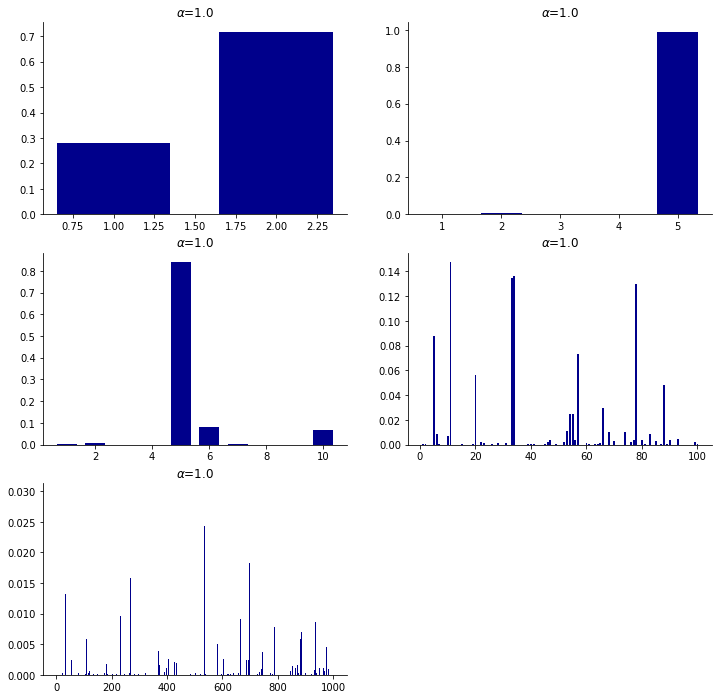

In [4]:
alpha = 0.1
C1 = dirichlet(alpha, 2, seed=0)
C2 = dirichlet(alpha, 5, seed=0)
C3 = dirichlet(alpha, 10, seed=0)
C4 = dirichlet(alpha, 100, seed=0)
C5 = dirichlet(alpha, 1000, seed=0)
plot_atoms([C1, C2, C3, C4, C5], np.ones(5))

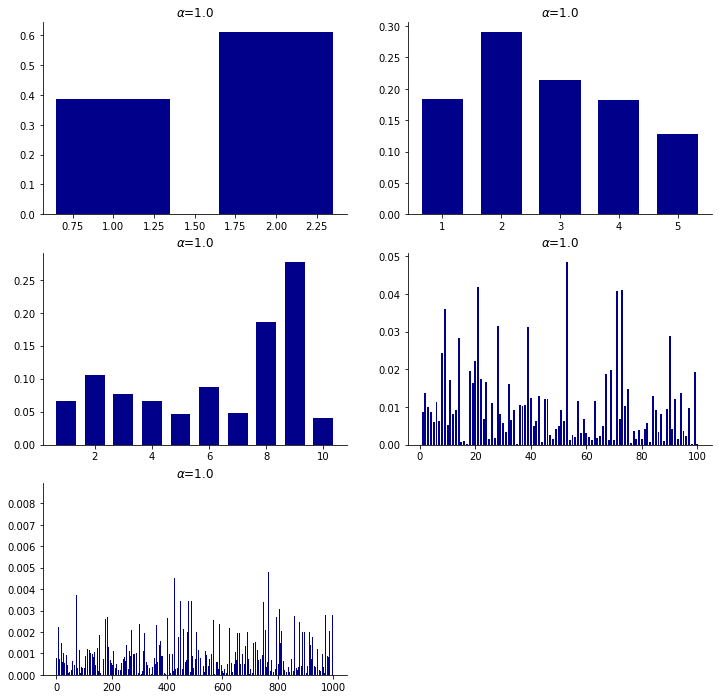

In [5]:
alpha = 1
C1 = dirichlet(alpha, 2, seed=0)
C2 = dirichlet(alpha, 5, seed=0)
C3 = dirichlet(alpha, 10, seed=0)
C4 = dirichlet(alpha, 100, seed=0)
C5 = dirichlet(alpha, 1000, seed=0)
plot_atoms([C1, C2, C3, C4, C5], np.ones(5))

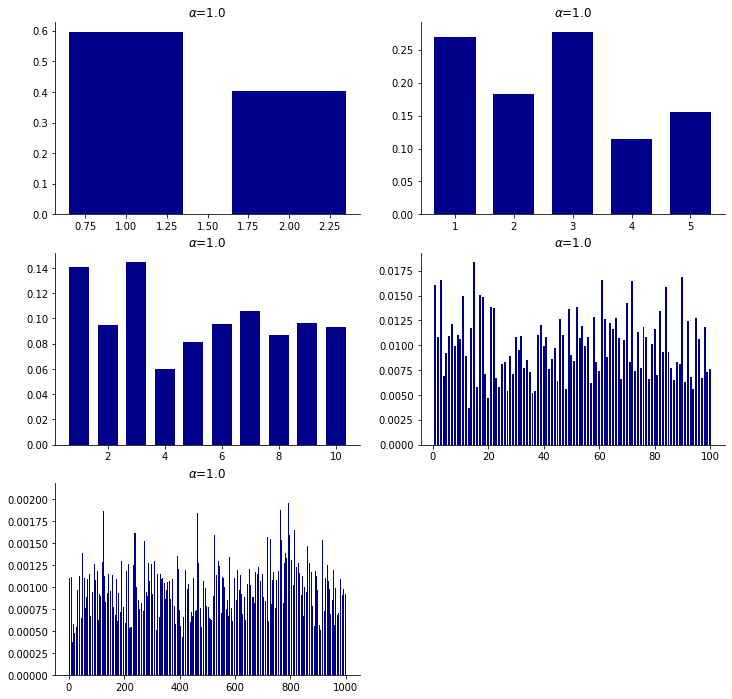

In [6]:
alpha = 10
C1 = dirichlet(alpha, 2, seed=0)
C2 = dirichlet(alpha, 5, seed=0)
C3 = dirichlet(alpha, 10, seed=0)
C4 = dirichlet(alpha, 100, seed=0)
C5 = dirichlet(alpha, 1000, seed=0)
plot_atoms([C1, C2, C3, C4, C5], np.ones(5))

Lower alpha results in very sparse distribution, with many zeros and high variance, while higher alpha makes the atoms more uniform. In addition, a higher dimension results in less variance and the size of the atom is decreasing because there are more dimensions over which the mass must be distributed.

# B. Stick-Breaking Process
If the number $K$ of mixture components is infinite, we can sample from a distribution $H$ on $[0,1]$ and we break a large bar by 1 in two, then we sample from H again and we break the rest of the bar in two and so on. This process end with probability 1 and when $H=Beta(1, \alpha)$ this process is called stick-breaking, defined by

\begin{align}
& V_{1}, V_{2}, \ldots \sim_{iid} Beta(1, \alpha)\\
& C_{k} = V_{k}\prod_{j=1}^{k-1}(1-V_{k})\\
\end{align}

Note: in practice, when we sample from this distribution we need to add a tolerance (1e-8) so that the process ends in a reasonable number of steps.

In [7]:
def stick_breaking(alpha, seed=0):
    np.random.seed(seed)
    V = []
    C = []
    while not isclose(sum(C), 1, rel_tol=1e-8):
        # V_k~beta(1,alpha)
        V.append(np.random.beta(1, alpha))
        # C_k=V_k*\prod_{j=1}^{k-1}(1-V_j)
        rest = (1-np.array(V[:-1])).prod()
        C.append(V[-1]*rest)
    return np.array(C)

In [8]:
C1 = stick_breaking(0.1, 9)
C2 = stick_breaking(0.2, 7)
C3 = stick_breaking(0.6, 100)
C4 = stick_breaking(6, 0)
C5 = stick_breaking(60, 0)

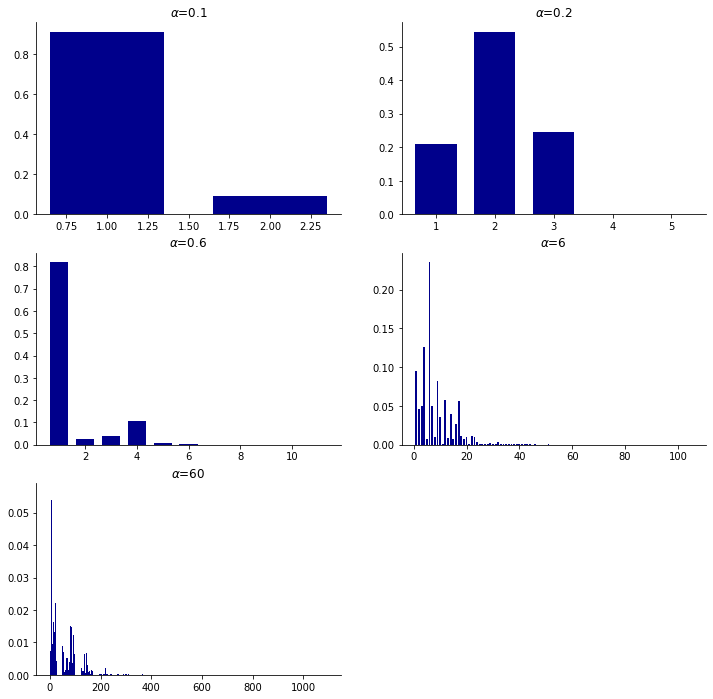

In [9]:
plot_atoms([C1, C2, C3, C4, C5], [0.1, 0.2, 0.6, 6, 60])

The higher the alpha, the less variance and the greater number of atoms, on the contrary, small values of alpha show a high variance and a lower number of atoms, additionally they show a greater variance in the number of atoms according to the random seed.

# C. Dirichlet Process

If $\alpha>0$ and if $G$ is a probability measure on $\Omega_{\phi}$ the random discrete probability measure $\Theta:=\sum C_{k}\delta_{\Phi_{k}}$ generated by

\begin{align}
& V_{1}, V_{2}, \ldots \sim_{iid} Beta(1, \alpha)\\
& C_{k} = V_{k}\prod_{j=1}^{k-1}(1-V_{k})\\
& \Phi_{1}, \Phi_{2}, \ldots \sim_{iid} G_{0}
\end{align}

is called a Dirichlet Process (DP) with base measure $G$ and concentration paremeter $\alpha>0$, and we denote its law by $DP(\alpha, G_{0})$.

## C1. Base Measure

We will sample from a dirichlet process with base measure $\mathcal{N}(0, 10)$.

In [10]:
def dirichlet_process(alpha, mu=0, sigma=1, seed=0):
    # atoms sizes
    C = stick_breaking(alpha, seed=seed)
    # gaussian base measure
    np.random.seed(seed)
    Phi = np.array([np.random.normal(mu,sigma) for C_k in C]) 
    return C, Phi

In [11]:
C1, Phi1 = dirichlet_process(0.1, mu=0, sigma=10, seed=9)
C2, Phi2 = dirichlet_process(0.2, mu=0, sigma=10, seed=7)
C3, Phi3 = dirichlet_process(0.6, mu=0, sigma=10, seed=100)
C4, Phi4 = dirichlet_process(6, mu=0, sigma=10, seed=0)
C5, Phi5 = dirichlet_process(60, mu=0, sigma=10, seed=0)

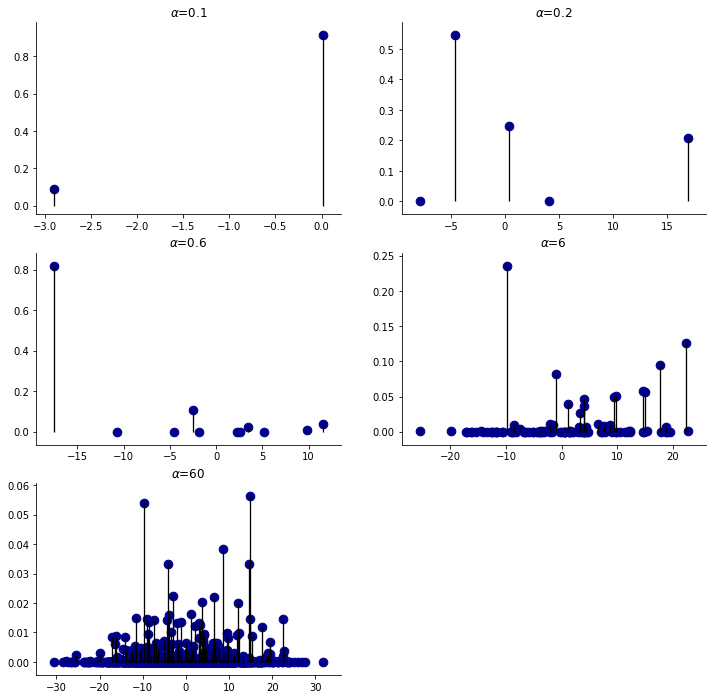

In [12]:
plot_dp([C1, C2, C3, C4, C5], [Phi1, Phi2, Phi3, Phi4, Phi5],  [0.1, 0.2, 0.6, 6, 60])

For small concentration the atoms sizes exhibit high variance and for larges values of the concentration the atoms sizes become more even.

# D. Sampling 


We want to sample from $\Theta \sim Dir(\alpha, G)$ by $N$ times:

\begin{align}
\Theta := \sum C_{k}\delta_{\Phi_{k}}
\end{align}


how we know $C_{1:K}$ and $Phi_{1:K}$ from the stick-breaking process, then we can sample from this discrete distribution a sequence $\phi_{1}, \phi_{2}, \ldots$ by:

\begin{align}
k\sim Mult(C)\\
\phi_{i} = \Phi_{k}
\end{align}

In [13]:
def sampling(C, Phi, N):
    L = np.random.choice(list(range(len(C))), N, p=C)
    return Phi[L]

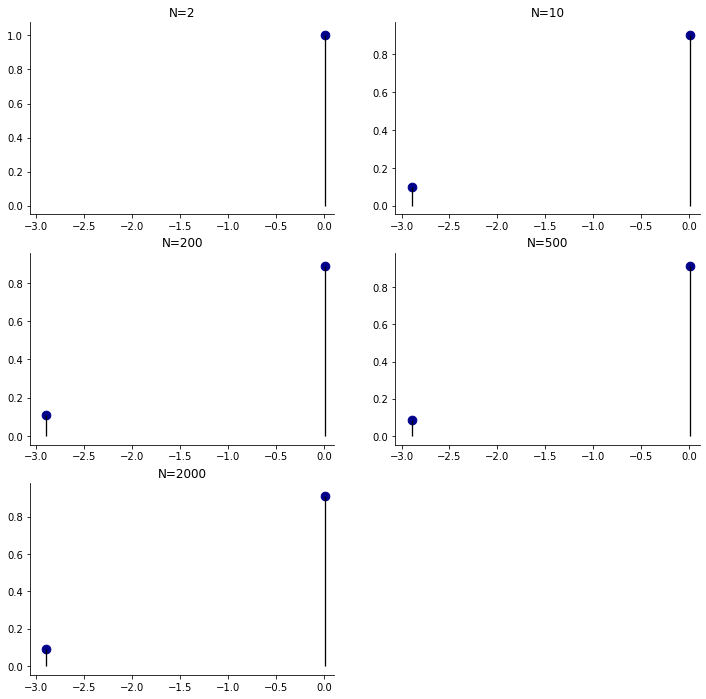

In [14]:
# alpha = 0.1
N = [2, 10, 200, 500, 2000]
phi1 = [sampling(C1, Phi1, n) for n in N]
plot_samples_dp(phi1, N, (Phi1.min()-0.17, Phi1.max()+0.1))

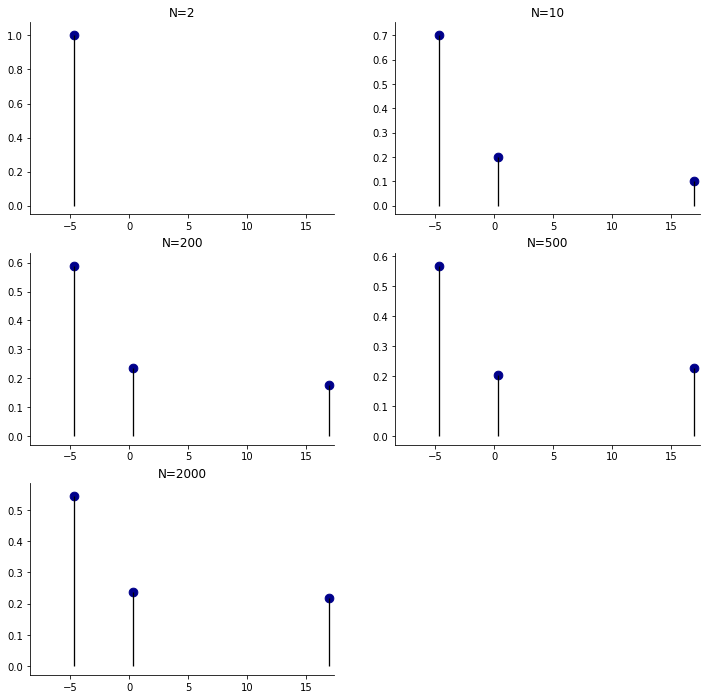

In [15]:
# alpha = 0.2
N = [2, 10, 200, 500, 2000]
phi2 = [sampling(C2, Phi2, n) for n in N]
plot_samples_dp(phi2, N, (Phi2.min()-0.5, Phi2.max()+0.5))

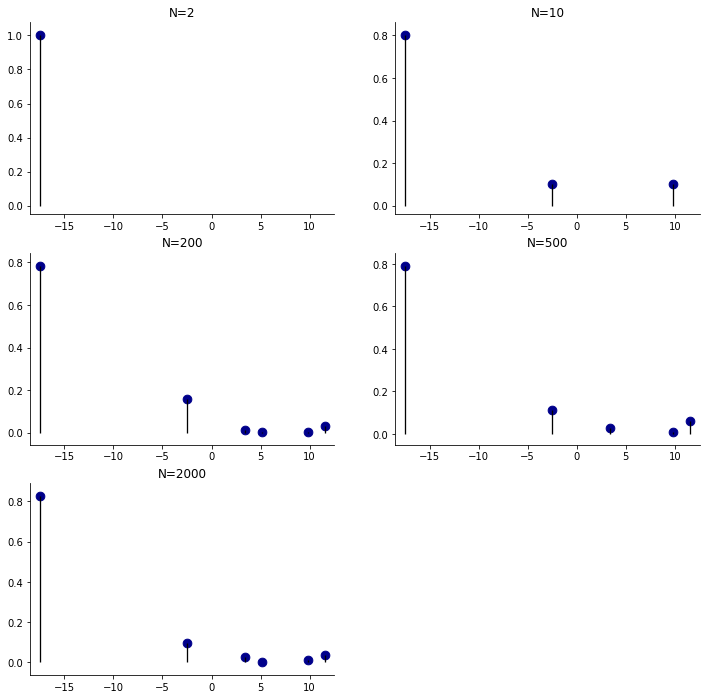

In [17]:
# alpha = 0.6
N = [2, 10, 200, 500, 2000]
phi3 = [sampling(C3, Phi3, n) for n in N]
plot_samples_dp(phi3, N, (Phi3.min()-1, Phi3.max()+1))

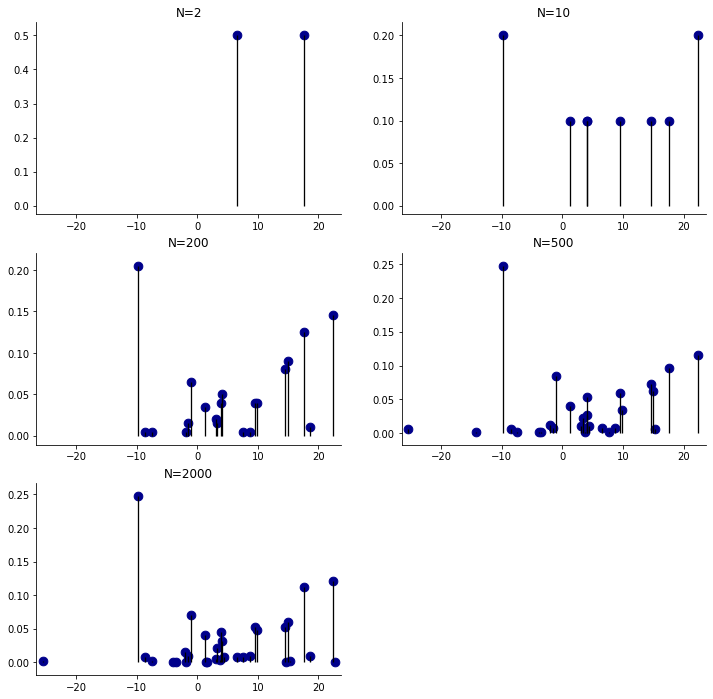

In [18]:
# alpha = 6
N = [2, 10, 200, 500, 2000]
phi4 = [sampling(C4, Phi4, n) for n in N]
plot_samples_dp(phi4, N, (Phi4.min()-1, Phi4.max()+1))

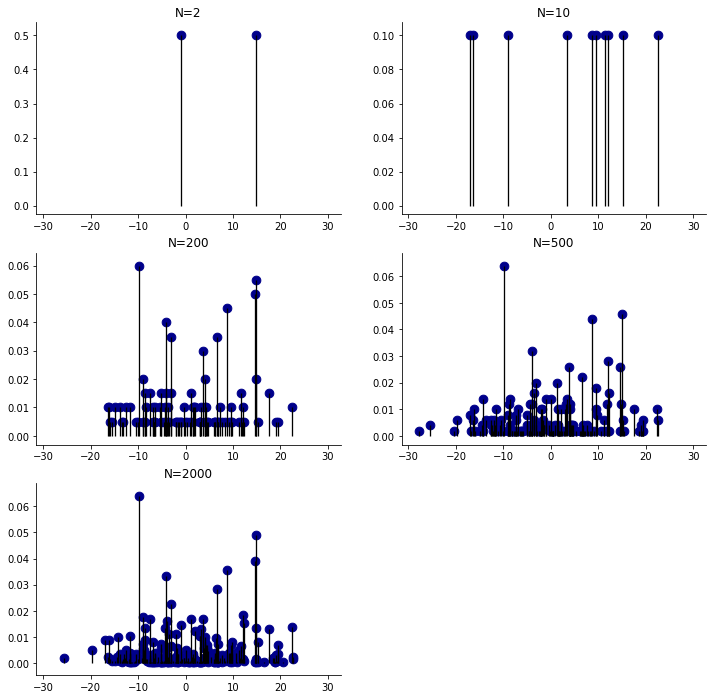

In [19]:
# alpha = 0.6
N = [2, 10, 200, 500, 2000]
phi5 = [sampling(C5, Phi5, n) for n in N]
plot_samples_dp(phi5, N, (Phi5.min()-1, Phi5.max()+1))

To higher $N$ the possibility of repeating a previous $\phi$ is greater and this occurs with greater probability for smaller $\alpha$, this is because the number of possibilities/atoms is less. In addition, to higher $N$ the empirical distribution converge to the true discrete distribution.